In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns; sns.set()

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lattitude = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lattitude.append(lat_lng[0])

# Print the city count to confirm sufficient count
len(cities)
len(lattitude)

616

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="
print(api_key)

fdbc770fadceeb5915b03fc319dd0733


In [4]:
#set up table
df = pd.DataFrame(cities)
df['Lat'] = lattitude
df.head()

,0,Lat
0,barrow,80.498455
1,geraldton,-31.772055
2,tsienyane,-22.026832
3,albany,-62.097507
4,belaya gora,67.157934


In [5]:
df['Temperature'] = ""
df['Humidity'] = ""
df['Cloudiness'] = ""
df['Wind Speed'] = ""

df['Cities'] = df.loc[:,0]

del df[0]

df = df[['Cities','Lat','Temperature','Humidity','Cloudiness','Wind Speed']]
df.head()

,Cities,Lat,Temperature,Humidity,Cloudiness,Wind Speed
0,barrow,80.498455,,,,
1,geraldton,-31.772055,,,,
2,tsienyane,-22.026832,,,,
3,albany,-62.097507,,,,
4,belaya gora,67.157934,,,,


In [6]:
#test the script and find the json format
citytest = "London"

query = f"{url}{api_key}&q={citytest}"
print(query)
response = requests.get(query).json()
pprint(response)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fdbc770fadceeb5915b03fc319dd0733&q=London
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1534702800,
 'id': 2643743,
 'main': {'humidity': 64,
          'pressure': 1018,
          'temp': 73.4,
          'temp_max': 75.2,
          'temp_min': 71.6},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 5093,
         'message': 0.0057,
         'sunrise': 1534654403,
         'sunset': 1534706007,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280, 'speed': 12.75}}


In [7]:
#get the temperature of each city
for index,row in df.iterrows():
    city = row['Cities']
    query = f"{url}{api_key}&q={city}"
    print(f"Retrieving Results for Index {index}: {city}.") 
    response = requests.get(query).json()
    result = response
    
    try:
        print(f"The {city} temp is {result['main']['temp']}.")
        print(f"The {city} humidity is {result['main']['humidity']}.")
        print(f"The {city} cloudiness is {result['clouds']['all']}.")
        print(f"The {city} wind speed is {result['wind']['speed']}.")
        
        df.loc[index, 'Temperature'] = result['main']['temp']
        df.loc[index, 'Humidity'] = result['main']['humidity']
        df.loc[index, 'Cloudiness'] = result['clouds']['all']
        df.loc[index, 'Wind Speed'] = result['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.") 
        
    print("------------") #space between the different rows

df.head()

Retrieving Results for Index 0: barrow.
The barrow temp is 44.5.
The barrow humidity is 71.
The barrow cloudiness is 68.
The barrow wind speed is 13.56.
------------
Retrieving Results for Index 1: geraldton.
The geraldton temp is 73.4.
The geraldton humidity is 69.
The geraldton cloudiness is 90.
The geraldton wind speed is 14.99.
------------
Retrieving Results for Index 2: tsienyane.
Missing field/result... skipping.
------------
Retrieving Results for Index 3: albany.
The albany temp is 76.55.
The albany humidity is 44.
The albany cloudiness is 75.
The albany wind speed is 6.93.
------------
Retrieving Results for Index 4: belaya gora.
The belaya gora temp is 34.42.
The belaya gora humidity is 95.
The belaya gora cloudiness is 0.
The belaya gora wind speed is 4.38.
------------
Retrieving Results for Index 5: qaanaaq.
The qaanaaq temp is 41.26.
The qaanaaq humidity is 89.
The qaanaaq cloudiness is 8.
The qaanaaq wind speed is 4.94.
------------
Retrieving Results for Index 6: rikit

The codrington temp is 46.75.
The codrington humidity is 40.
The codrington cloudiness is 0.
The codrington wind speed is 8.3.
------------
Retrieving Results for Index 51: kapaa.
The kapaa temp is 83.39.
The kapaa humidity is 88.
The kapaa cloudiness is 40.
The kapaa wind speed is 10.29.
------------
Retrieving Results for Index 52: bambanglipuro.
The bambanglipuro temp is 62.41.
The bambanglipuro humidity is 99.
The bambanglipuro cloudiness is 0.
The bambanglipuro wind speed is 2.15.
------------
Retrieving Results for Index 53: yar-sale.
The yar-sale temp is 54.04.
The yar-sale humidity is 88.
The yar-sale cloudiness is 24.
The yar-sale wind speed is 14.
------------
Retrieving Results for Index 54: caravelas.
The caravelas temp is 75.19.
The caravelas humidity is 100.
The caravelas cloudiness is 20.
The caravelas wind speed is 10.65.
------------
Retrieving Results for Index 55: cape town.
The cape town temp is 57.2.
The cape town humidity is 82.
The cape town cloudiness is 90.
The

The sukumo temp is 73.21.
The sukumo humidity is 82.
The sukumo cloudiness is 32.
The sukumo wind speed is 7.07.
------------
Retrieving Results for Index 99: alotau.
Missing field/result... skipping.
------------
Retrieving Results for Index 100: acapulco.
The acapulco temp is 86.
The acapulco humidity is 74.
The acapulco cloudiness is 40.
The acapulco wind speed is 6.93.
------------
Retrieving Results for Index 101: devils lake.
The devils lake temp is 68.77.
The devils lake humidity is 35.
The devils lake cloudiness is 1.
The devils lake wind speed is 14.99.
------------
Retrieving Results for Index 102: wajir.
The wajir temp is 84.2.
The wajir humidity is 42.
The wajir cloudiness is 0.
The wajir wind speed is 17.22.
------------
Retrieving Results for Index 103: kalmar.
The kalmar temp is 69.8.
The kalmar humidity is 68.
The kalmar cloudiness is 0.
The kalmar wind speed is 4.7.
------------
Retrieving Results for Index 104: ulagan.
The ulagan temp is 47.92.
The ulagan humidity is 

The esperance temp is 87.8.
The esperance humidity is 62.
The esperance cloudiness is 40.
The esperance wind speed is 9.17.
------------
Retrieving Results for Index 150: sangamner.
The sangamner temp is 73.39.
The sangamner humidity is 89.
The sangamner cloudiness is 88.
The sangamner wind speed is 13.22.
------------
Retrieving Results for Index 151: ponta do sol.
The ponta do sol temp is 76.72.
The ponta do sol humidity is 50.
The ponta do sol cloudiness is 0.
The ponta do sol wind speed is 4.38.
------------
Retrieving Results for Index 152: jawhar.
The jawhar temp is 73.84.
The jawhar humidity is 98.
The jawhar cloudiness is 92.
The jawhar wind speed is 8.63.
------------
Retrieving Results for Index 153: new norfolk.
The new norfolk temp is 37.4.
The new norfolk humidity is 69.
The new norfolk cloudiness is 20.
The new norfolk wind speed is 10.29.
------------
Retrieving Results for Index 154: saint-pierre.
The saint-pierre temp is 76.21.
The saint-pierre humidity is 60.
The sain

The kaitangata temp is 24.97.
The kaitangata humidity is 59.
The kaitangata cloudiness is 12.
The kaitangata wind speed is 8.41.
------------
Retrieving Results for Index 199: gola gokarannath.
The gola gokarannath temp is 86.35.
The gola gokarannath humidity is 86.
The gola gokarannath cloudiness is 32.
The gola gokarannath wind speed is 2.93.
------------
Retrieving Results for Index 200: puerto leguizamo.
The puerto leguizamo temp is 90.13.
The puerto leguizamo humidity is 57.
The puerto leguizamo cloudiness is 0.
The puerto leguizamo wind speed is 2.93.
------------
Retrieving Results for Index 201: kathmandu.
The kathmandu temp is 71.6.
The kathmandu humidity is 88.
The kathmandu cloudiness is 75.
The kathmandu wind speed is 5.82.
------------
Retrieving Results for Index 202: saleaula.
Missing field/result... skipping.
------------
Retrieving Results for Index 203: homer.
The homer temp is 60.8.
The homer humidity is 67.
The homer cloudiness is 90.
The homer wind speed is 8.05.
-

The brandfort temp is 53.6.
The brandfort humidity is 46.
The brandfort cloudiness is 0.
The brandfort wind speed is 3.36.
------------
Retrieving Results for Index 245: san cristobal.
The san cristobal temp is 60.8.
The san cristobal humidity is 55.
The san cristobal cloudiness is 75.
The san cristobal wind speed is 20.8.
------------
Retrieving Results for Index 246: broken hill.
The broken hill temp is 35.95.
The broken hill humidity is 95.
The broken hill cloudiness is 0.
The broken hill wind speed is 5.95.
------------
Retrieving Results for Index 247: cabo san lucas.
The cabo san lucas temp is 91.63.
The cabo san lucas humidity is 59.
The cabo san lucas cloudiness is 5.
The cabo san lucas wind speed is 9.17.
------------
Retrieving Results for Index 248: verkhnevilyuysk.
The verkhnevilyuysk temp is 58.18.
The verkhnevilyuysk humidity is 94.
The verkhnevilyuysk cloudiness is 32.
The verkhnevilyuysk wind speed is 2.59.
------------
Retrieving Results for Index 249: mahadday weyne.


Missing field/result... skipping.
------------
Retrieving Results for Index 296: chino.
The chino temp is 48.01.
The chino humidity is 95.
The chino cloudiness is 24.
The chino wind speed is 1.81.
------------
Retrieving Results for Index 297: daru.
The daru temp is 70.78.
The daru humidity is 100.
The daru cloudiness is 92.
The daru wind speed is 7.85.
------------
Retrieving Results for Index 298: northam.
The northam temp is 64.76.
The northam humidity is 82.
The northam cloudiness is 75.
The northam wind speed is 11.41.
------------
Retrieving Results for Index 299: dingle.
The dingle temp is 75.82.
The dingle humidity is 96.
The dingle cloudiness is 92.
The dingle wind speed is 5.17.
------------
Retrieving Results for Index 300: luau.
The luau temp is 72.76.
The luau humidity is 26.
The luau cloudiness is 0.
The luau wind speed is 5.17.
------------
Retrieving Results for Index 301: mergui.
Missing field/result... skipping.
------------
Retrieving Results for Index 302: beloha.
T

The osakarovka temp is 69.34.
The osakarovka humidity is 70.
The osakarovka cloudiness is 92.
The osakarovka wind speed is 4.94.
------------
Retrieving Results for Index 347: verkhnyaya inta.
The verkhnyaya inta temp is 54.31.
The verkhnyaya inta humidity is 92.
The verkhnyaya inta cloudiness is 64.
The verkhnyaya inta wind speed is 5.39.
------------
Retrieving Results for Index 348: galesong.
The galesong temp is 73.4.
The galesong humidity is 78.
The galesong cloudiness is 20.
The galesong wind speed is 3.36.
------------
Retrieving Results for Index 349: ixtapa.
The ixtapa temp is 87.8.
The ixtapa humidity is 70.
The ixtapa cloudiness is 20.
The ixtapa wind speed is 6.93.
------------
Retrieving Results for Index 350: adrar.
The adrar temp is 105.8.
The adrar humidity is 16.
The adrar cloudiness is 0.
The adrar wind speed is 16.11.
------------
Retrieving Results for Index 351: weyburn.
The weyburn temp is 67.45.
The weyburn humidity is 51.
The weyburn cloudiness is 0.
The weyburn

The plainview temp is 82.51.
The plainview humidity is 54.
The plainview cloudiness is 1.
The plainview wind speed is 5.82.
------------
Retrieving Results for Index 395: asayita.
Missing field/result... skipping.
------------
Retrieving Results for Index 396: sulangan.
The sulangan temp is 82.21.
The sulangan humidity is 100.
The sulangan cloudiness is 44.
The sulangan wind speed is 18.48.
------------
Retrieving Results for Index 397: bambous virieux.
The bambous virieux temp is 73.4.
The bambous virieux humidity is 69.
The bambous virieux cloudiness is 40.
The bambous virieux wind speed is 17.22.
------------
Retrieving Results for Index 398: huilong.
The huilong temp is 74.02.
The huilong humidity is 89.
The huilong cloudiness is 0.
The huilong wind speed is 0.92.
------------
Retrieving Results for Index 399: taoudenni.
The taoudenni temp is 105.61.
The taoudenni humidity is 20.
The taoudenni cloudiness is 24.
The taoudenni wind speed is 4.72.
------------
Retrieving Results for I

------------
Retrieving Results for Index 443: rawson.
The rawson temp is 50.98.
The rawson humidity is 35.
The rawson cloudiness is 0.
The rawson wind speed is 10.54.
------------
Retrieving Results for Index 444: paamiut.
The paamiut temp is 43.06.
The paamiut humidity is 100.
The paamiut cloudiness is 48.
The paamiut wind speed is 4.83.
------------
Retrieving Results for Index 445: kota kinabalu.
The kota kinabalu temp is 78.8.
The kota kinabalu humidity is 61.
The kota kinabalu cloudiness is 75.
The kota kinabalu wind speed is 5.82.
------------
Retrieving Results for Index 446: berezovyy.
The berezovyy temp is 49.99.
The berezovyy humidity is 96.
The berezovyy cloudiness is 0.
The berezovyy wind speed is 2.71.
------------
Retrieving Results for Index 447: waounde.
The waounde temp is 100.4.
The waounde humidity is 31.
The waounde cloudiness is 75.
The waounde wind speed is 4.7.
------------
Retrieving Results for Index 448: gat.
The gat temp is 89.6.
The gat humidity is 62.
The 

The luanda temp is 71.6.
The luanda humidity is 83.
The luanda cloudiness is 75.
The luanda wind speed is 4.7.
------------
Retrieving Results for Index 494: mweka.
The mweka temp is 85.72.
The mweka humidity is 46.
The mweka cloudiness is 56.
The mweka wind speed is 2.59.
------------
Retrieving Results for Index 495: paignton.
The paignton temp is 68.
The paignton humidity is 82.
The paignton cloudiness is 75.
The paignton wind speed is 11.41.
------------
Retrieving Results for Index 496: laela.
The laela temp is 61.96.
The laela humidity is 45.
The laela cloudiness is 0.
The laela wind speed is 4.72.
------------
Retrieving Results for Index 497: gorom-gorom.
The gorom-gorom temp is 84.91.
The gorom-gorom humidity is 71.
The gorom-gorom cloudiness is 0.
The gorom-gorom wind speed is 6.4.
------------
Retrieving Results for Index 498: krasne.
The krasne temp is 66.2.
The krasne humidity is 82.
The krasne cloudiness is 0.
The krasne wind speed is 5.84.
------------
Retrieving Results

The murakami temp is 56.02.
The murakami humidity is 93.
The murakami cloudiness is 32.
The murakami wind speed is 2.59.
------------
Retrieving Results for Index 542: chinhoyi.
The chinhoyi temp is 65.74.
The chinhoyi humidity is 29.
The chinhoyi cloudiness is 0.
The chinhoyi wind speed is 9.98.
------------
Retrieving Results for Index 543: manggar.
The manggar temp is 78.52.
The manggar humidity is 86.
The manggar cloudiness is 0.
The manggar wind speed is 9.64.
------------
Retrieving Results for Index 544: shelopugino.
The shelopugino temp is 48.37.
The shelopugino humidity is 89.
The shelopugino cloudiness is 0.
The shelopugino wind speed is 2.37.
------------
Retrieving Results for Index 545: dharmadam.
The dharmadam temp is 68.89.
The dharmadam humidity is 97.
The dharmadam cloudiness is 92.
The dharmadam wind speed is 1.92.
------------
Retrieving Results for Index 546: port shepstone.
The port shepstone temp is 64.21.
The port shepstone humidity is 83.
The port shepstone clou

The soyo temp is 73.75.
The soyo humidity is 76.
The soyo cloudiness is 0.
The soyo wind speed is 5.73.
------------
Retrieving Results for Index 590: sindor.
The sindor temp is 62.41.
The sindor humidity is 66.
The sindor cloudiness is 0.
The sindor wind speed is 9.08.
------------
Retrieving Results for Index 591: natitingou.
The natitingou temp is 77.
The natitingou humidity is 78.
The natitingou cloudiness is 75.
The natitingou wind speed is 5.82.
------------
Retrieving Results for Index 592: krasnoselkup.
Missing field/result... skipping.
------------
Retrieving Results for Index 593: ruteng.
The ruteng temp is 65.56.
The ruteng humidity is 92.
The ruteng cloudiness is 0.
The ruteng wind speed is 3.15.
------------
Retrieving Results for Index 594: los llanos de aridane.
The los llanos de aridane temp is 73.4.
The los llanos de aridane humidity is 73.
The los llanos de aridane cloudiness is 75.
The los llanos de aridane wind speed is 14.99.
------------
Retrieving Results for Ind

,Cities,Lat,Temperature,Humidity,Cloudiness,Wind Speed
0,barrow,80.498455,44.5,71,68,13.56
1,geraldton,-31.772055,73.4,69,90,14.99
2,tsienyane,-22.026832,,,,
3,albany,-62.097507,76.55,44,75,6.93
4,belaya gora,67.157934,34.42,95,0,4.38


In [8]:
#to csv

df.to_csv('./cities.csv')

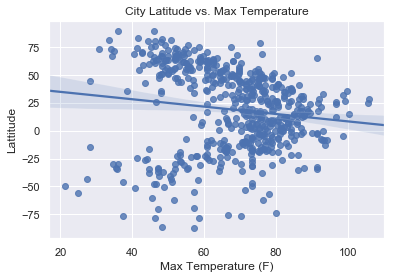

In [11]:
#representation of the Latitude of the dataset

#Temperature (F) vs. Latitude

df = df.dropna()
lat = df["Lat"]
temp = pd.to_numeric(df["Temperature"])

sns.regplot(x=temp, y=lat)
plt.xlabel('Max Temperature (F)')
plt.ylabel('Lattitude')
plt.title('City Latitude vs. Max Temperature')
plt.savefig('./temperature.png')

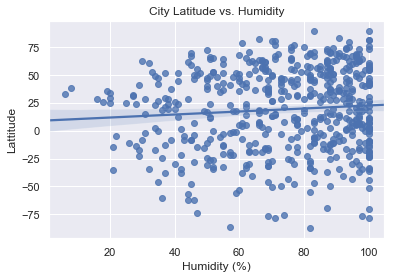

In [12]:
#Humidity (%) vs. Latitude

lat = df["Lat"]
hum = pd.to_numeric(df["Humidity"])

sns.regplot(x=hum, y=lat)
plt.xlabel('Humidity (%)')
plt.ylabel('Lattitude')
plt.title('City Latitude vs. Humidity')
plt.savefig('./humidity.png')

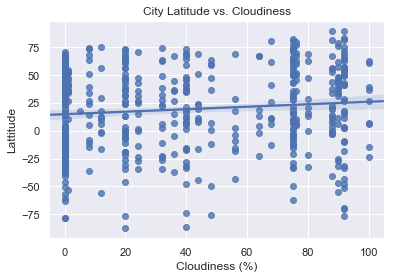

In [13]:
#Cloudiness (%) vs. Latitude

lat = df["Lat"]
cloud = pd.to_numeric(df["Cloudiness"])

sns.regplot(x=cloud, y=lat)
plt.xlabel('Cloudiness (%)')
plt.ylabel('Lattitude')
plt.title('City Latitude vs. Cloudiness')
plt.savefig('./cloud.png')

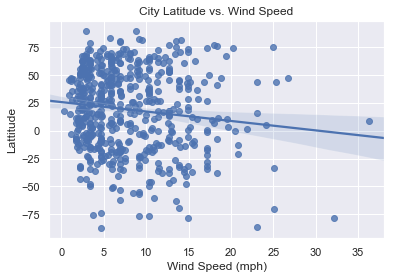

In [15]:
#Wind speed (mph) vs. Latitude

lat = df["Lat"]
wind = pd.to_numeric(df["Wind Speed"])

sns.regplot(x=wind, y=lat)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Lattitude')
plt.title('City Latitude vs. Wind Speed')
plt.savefig('./wind.png')

In [16]:
#bin wind data

bins = [0,10,20,30,40]
group_names = ['no wind','wind speed low','wind speed medium','wind speed high']
windstyle=pd.cut(wind, bins, labels=group_names)

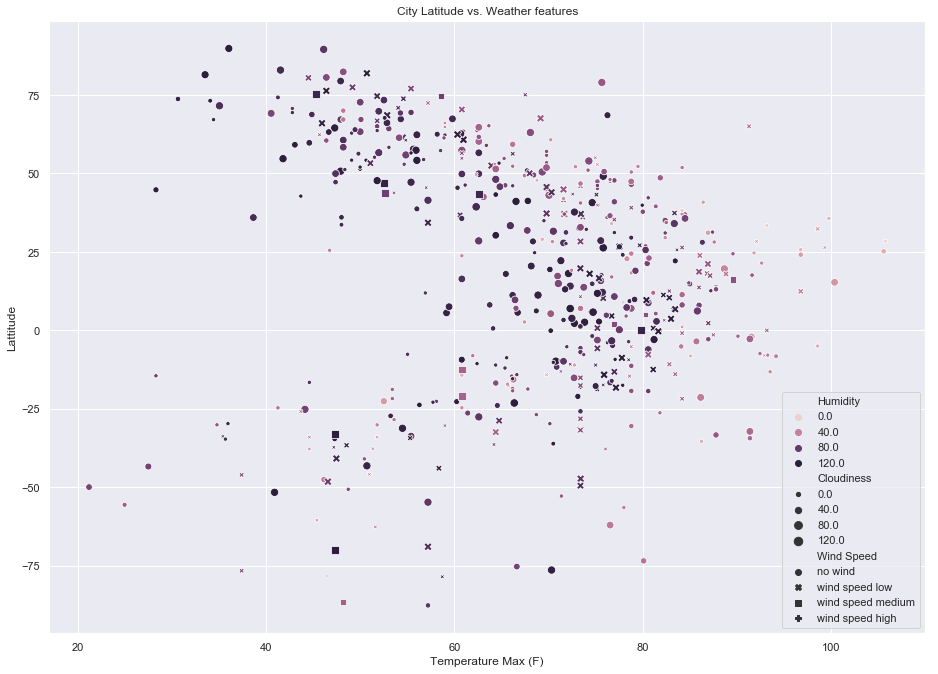

In [18]:
#all in one

a5_dims = (15.7, 11.27)
fig, ax = plt.subplots(figsize=a5_dims)
all = sns.scatterplot(ax=ax, x=temp, y=lat,size=cloud,hue=hum,style=windstyle,legend="brief")
plt.xlabel('Temperature Max (F)')
plt.ylabel('Lattitude')
plt.title('City Latitude vs. Weather features')
plt.savefig('./allin.png')